#**CS210 (Introduction to Data Science) Final Report**

## Introduction

The project is mainly about detecting the fradulent activities in eBay auctions. The main dataset used in the project is *Shill Bidding Dataset*. This data is about eBay auctions of a popular product. This dataset contains 9 features about the auctions and biddings. There are also specific ID data for auctions, bidders and record. In addition to that, there is a label for each event which specifies if the bidding activity is fradualent or not. Data is labelled as;



1 -> Fradulent activity

0 -> Normal activity



In this project, the relation between given features and labels will be analized using the data science methods. Also, it will be tried to develop a system to detect fradualent activities without knowing the label by using Machine Learning tools.







### Problem Definition

**Purpose:** The purpose of the project is to observe and analyse the effect of the given attributes in the dataset of different biddings to detect the fraud in eBay auctions and try to build a machine learning model to classify fraudulent activities in an auction.

**Project Steps:**

1- Data will be transformed in a manageable format.

2- Statistical analysis and hypotesis testing methods will be used on the dataset in order to see effect of the features on the label.

3- Statistical analysis methods such as corelation calculation and visulization of the data, selection of the exisiting features and creation of the new features will be done.

4- Data scaler methods will be used  to see the impact of the features of the bidding on the classification of the type of bidding as normal behaviour or fraudulent behaviour. These methods will provide the normalization of the data.

5- After these results, different machine learning algorithms will be used to generate a classifier model.

6- The efficiency of the generated models will be evaluated with the relevant metrics for the problem.

7- Then, hyperparameter tuning will be done for increasing the efficiency of the selected classifier model with the selected machine learning algorithm.

**Product of the Project:** The product of this project will be useful for detecting the fraudulent activities in auctions and creating a safer environment for the bidders.


### Utilized Datasets

The main dataset used in the project is *Shill Bidding Dataset*. Because the dataset is very specific which focuses on the specific eBay auctions, there are no additional datasets about the same eBay auctions. In this section, the main dataset is expalined.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/CS210_TermProject_2022Fall_Group33

/content/drive/MyDrive/CS210_TermProject_2022Fall_Group33


In [ ]:
df = pd.read_csv('Shill Bidding Dataset.csv')
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


This is the main dataset in Data Frame format. The explanation of the columns in the data is given below:

**1- Record ID:** Unique ID's for every record in the dataset.

**2- Auction ID:** Unique ID's for different auction events in the dataset.

**3- Bidder ID:** Unique ID's for different bidders in the dataset. This ID is given in a hidden format because of the personal data protection.

**4- Bidder Tendency:** This stands for how many of the bidders are tend to involve in the specific auction.

**5- Bidding Ratio:** This stands for how frequent is the biddings in the auction

**6- Successive Outbidding:** This stands for can the bidder successively outbid itself from the bidding.

**7- Last Bidding:** This stands for last bidding of the bidder in the bidding compared to all bidding duration.

**8- Auction Bids:** This stands for the ratio of the bidder to involve in biddings.

**9- Auction Starting Price:** The average starting price of the auction.

**10- Early Bidding:** This stands for how much early does the bidder tend to bid in the auction.

**11- Winning Ratio:** The ratio of the number of auction wins of the bidder and the number of auctions that bidder is involved.

**12- Auction Duration:** The lasting time of the auction.

**13- Class:** This is the label or target variable of the bidding event. This column can only take two different values as 0 and 1. 0 stands for a normal behaviour bidding and 1 stands for a fradualent bidding.

## Data Exploration

In this section, the data is explored by using data science tools like statistical analysis, data visulization, corelation calculations of the different features and label, hypotesis testing on the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


There are 6321 instances in the dataset with 13 different columns. 12 columns are for features and the last column is for the target variable. The dimension of the dataset is also given below:

In [ ]:
print("Data dimensionality is:", df.shape)

Data dimensionality is: (6321, 13)


These are the names of the columns in the dataset.

In [ ]:
df.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

There are no NULL values in the dataset.

In [ ]:
df.isnull().sum()/df.shape[0]

Record_ID                 0.0
Auction_ID                0.0
Bidder_ID                 0.0
Bidder_Tendency           0.0
Bidding_Ratio             0.0
Successive_Outbidding     0.0
Last_Bidding              0.0
Auction_Bids              0.0
Starting_Price_Average    0.0
Early_Bidding             0.0
Winning_Ratio             0.0
Auction_Duration          0.0
Class                     0.0
dtype: float64

This is the mean, standard deviation, min and max values for every feature in the dataset.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record_ID,6321.0,7535.829457,4364.759137,1.000000,3778.000000,7591.000000,11277.000000,15144.000000
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.000000
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.000000
Last_Bidding,6321.0,0.463119,0.380097,0.000000,0.047928,0.440937,0.860363,0.999900
Auction_Bids,6321.0,0.231606,0.255252,0.000000,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000,0.000000,0.000000,0.993593,0.999935
Early_Bidding,6321.0,0.430683,0.380785,0.000000,0.026620,0.360104,0.826761,0.999900
Winning_Ratio,6321.0,0.367731,0.436573,0.000000,0.000000,0.000000,0.851852,1.000000


### Feature Generation

New features are created by using the existing features. There are 3 new generated features that are created from by basic operations to the existing features.

In [ ]:
df["new_fearture1"] = df["Last_Bidding"] + df["Early_Bidding"]
df["new_fearture2"] = df["Bidding_Ratio"]*df["Auction_Bids"]
df["new_fearture3"] = df["Bidding_Ratio"]*df["Bidder_Tendency"]

The effectiveness of the new generated features will be examined in the following sections.


In [ ]:
df = df[df.columns.tolist()[:-4] + df.columns.tolist()[-3:] + [df.columns.tolist()[-4]]]

#### Data Visulization and Statistical Measurements

After that, data visulization about the statistical aspects of the data is done. In the plot below, normal distribution of the all features can be seen with their mean values.

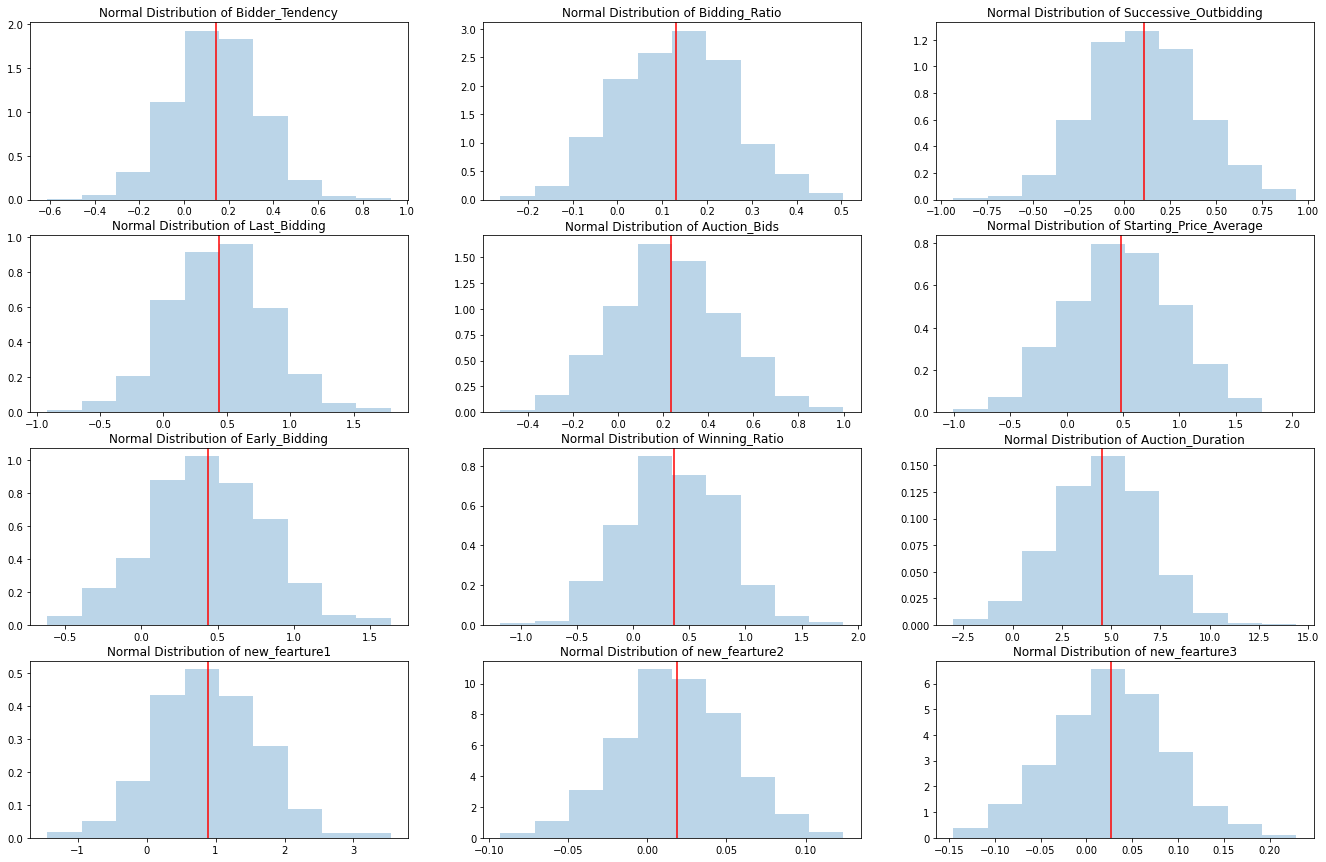

In [ ]:
from scipy.stats import skewnorm, norm

col_list = df.columns.tolist()[3:-1]

fig, axes = plt.subplots(4,3, figsize=(23, 15))

j=0
k=0
for i in col_list:
  m = df[i].mean()
  s = df[i].std()
  r_norm = norm.rvs(loc=m, scale=s, size=1000)
  axes[k][j].hist(r_norm, alpha=0.3, density=True)
  axes[k][j].set_title("Normal Distribution of " + i)
  axes[k][j].axvline(r_norm.mean(), 0, 1, c="r")
  j+=1
  if j % 3 == 0:
    k+=1
    j=0

plt.show()

Then, the correlation of the each feature with the target variable is calculated. If the calculated corelation is high, it means that the effect of that feature on te label is high. From the results below, it is seen that the most effective feature is the successive outbidding to detect the fradualent activities.

In [ ]:
col_list = df.columns.tolist()[3:-1]

for c in col_list:
    corr = np.corrcoef(df['Class'], df[c])
    print('Class -',c,':',corr[0][1])


Class - Bidder_Tendency : 0.2955330597630124
Class - Bidding_Ratio : 0.5694345810618542
Class - Successive_Outbidding : 0.9010351522611968
Class - Last_Bidding : 0.09765526654847806
Class - Auction_Bids : 0.04496442619373064
Class - Starting_Price_Average : 0.04260359927153741
Class - Early_Bidding : 0.053570487369573844
Class - Winning_Ratio : 0.3941224745834584
Class - Auction_Duration : 0.021145083072882424
Class - new_fearture1 : 0.07655405914942466
Class - new_fearture2 : 0.4887148935123352
Class - new_fearture3 : 0.47777004063848816


These are the violin plots for each feature respect to the label. It also show the feature importance to the label like correlation calculation. From the plots below, successive outbidding, bidding ratio and winning ratio features are effective on the target variable. It means that, these features will be more effective in the machine learning models for classification.

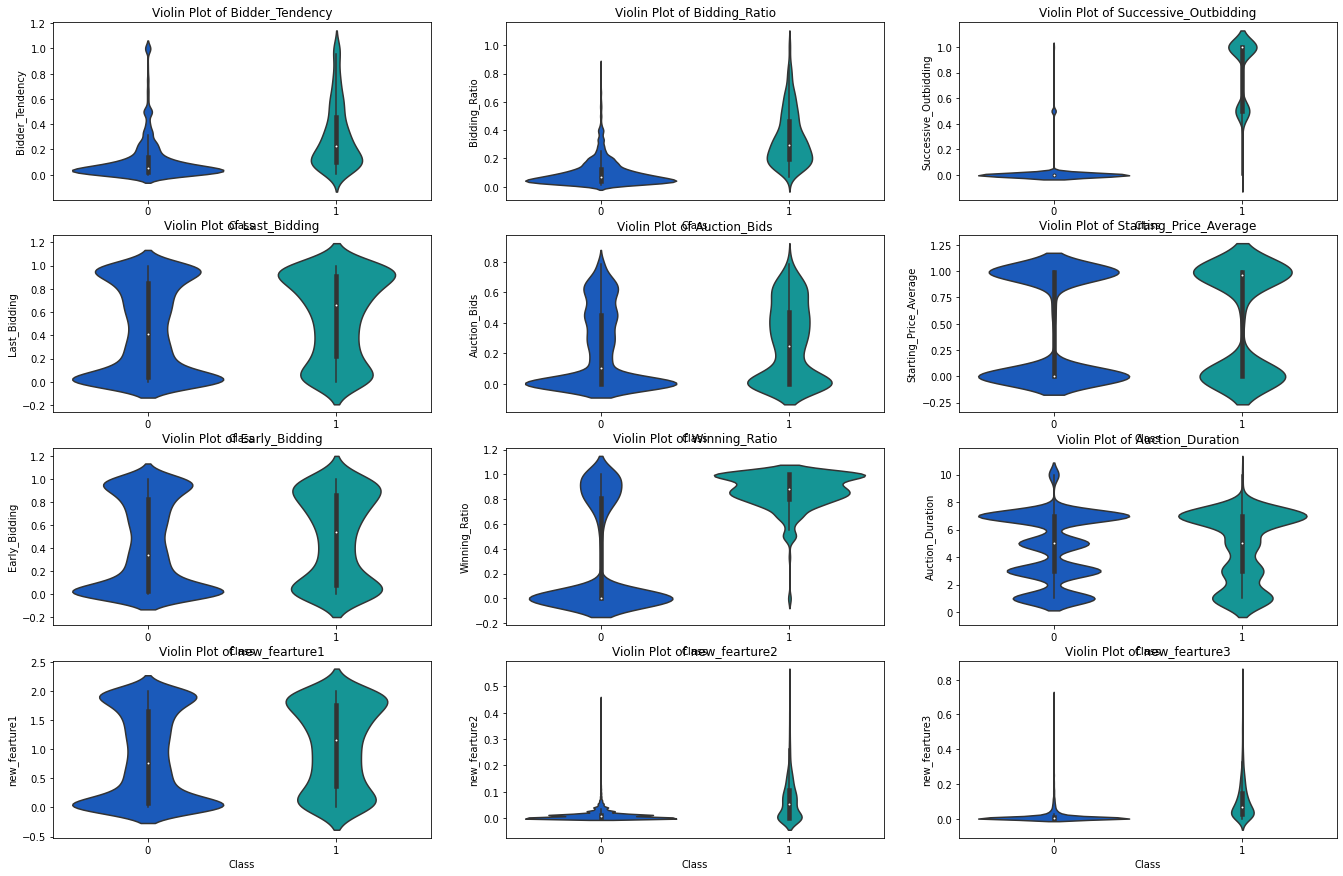

In [ ]:
col_list = df.columns.tolist()[3:-1]

fig, axes = plt.subplots(4,3, figsize=(23, 15))

j=0
k=0
for i in col_list:

  sns.violinplot(x='Class',y=i,data=df,palette='winter',ax=axes[k][j])
  axes[k][j].set_title("Violin Plot of " + i)
  j+=1
  if j % 3 == 0:
    k+=1
    j=0

plt.show()

This is another violin plot that shows the distrubution of the every feature based on their labels. From this plot, it can be observed that new feature1 is not efficient for classification. However, new feature 2 and new feature 3 can be effective in classification. They will be examined in other sections to check if they are effective or not.


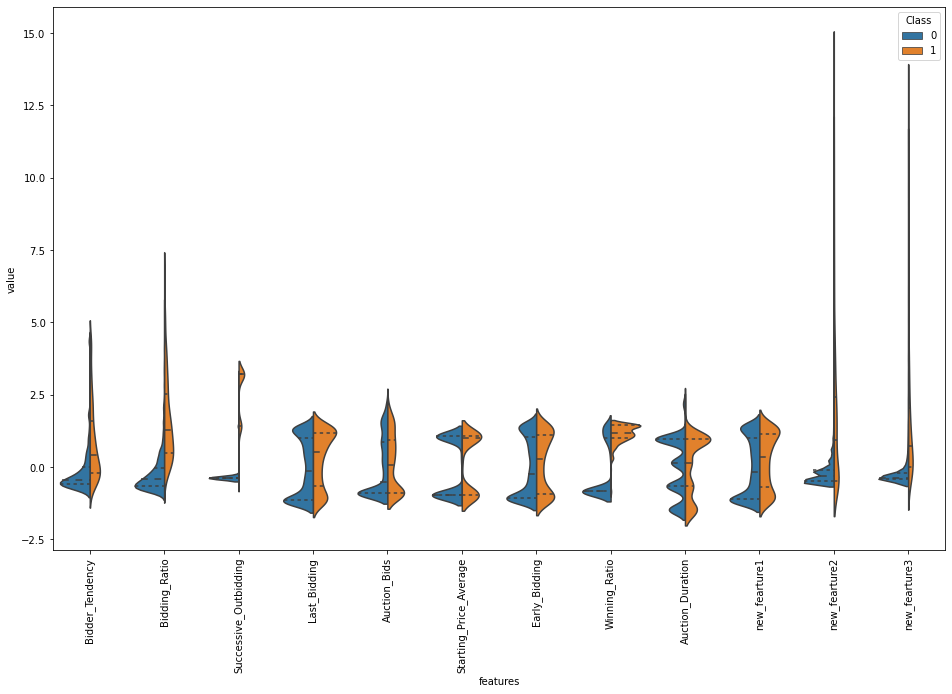

In [ ]:
data_label = df["Class"]
data = df[['Bidder_Tendency','Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
           'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding','Winning_Ratio', 'Auction_Duration',
           'new_fearture1', 'new_fearture2', 'new_fearture3']]

data_n_2 = (data - data.mean()) / (data.std())
data_ = pd.concat([data_label,data_n_2.iloc[:,:]],axis=1)

data_ = pd.melt(data_,id_vars="Class",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(16,10))
sns.violinplot(x="features", y="value", hue="Class", data=data_,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

This is an heatmap plot of the dataset to show the corelation between every column in the dataset. From the plot, it is seen that, last bidding and early bidding have high correlation. Also, starting price and action bids have relatively higher correlation than the other feature pairs.

These informations achieved by the visualization will be useful for creating new features from the existing ones.

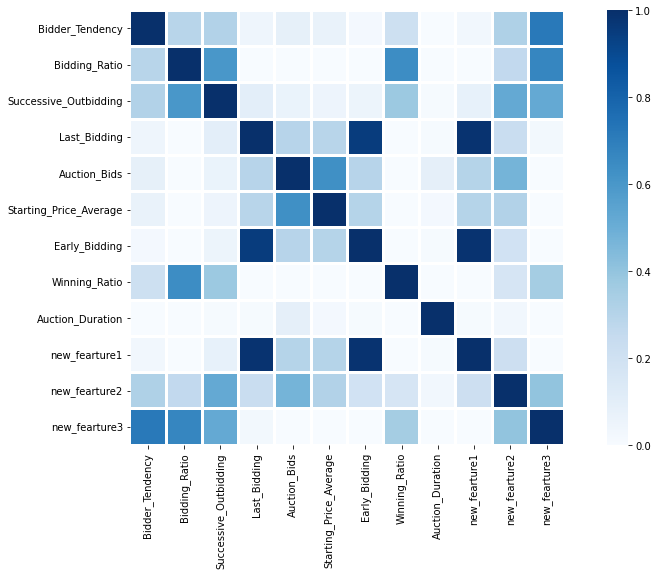

In [ ]:
df_ = df[df.columns.tolist()[3:-1]]
corr = df_.corr()

plt.figure(figsize=(15,8))
ax1 = sns.heatmap(corr, cbar=1, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

These are the box plots for every feature to show the statistical distributions for the each feature. These box plots give information on the statistical aspects of the features such as mean, median and variance.

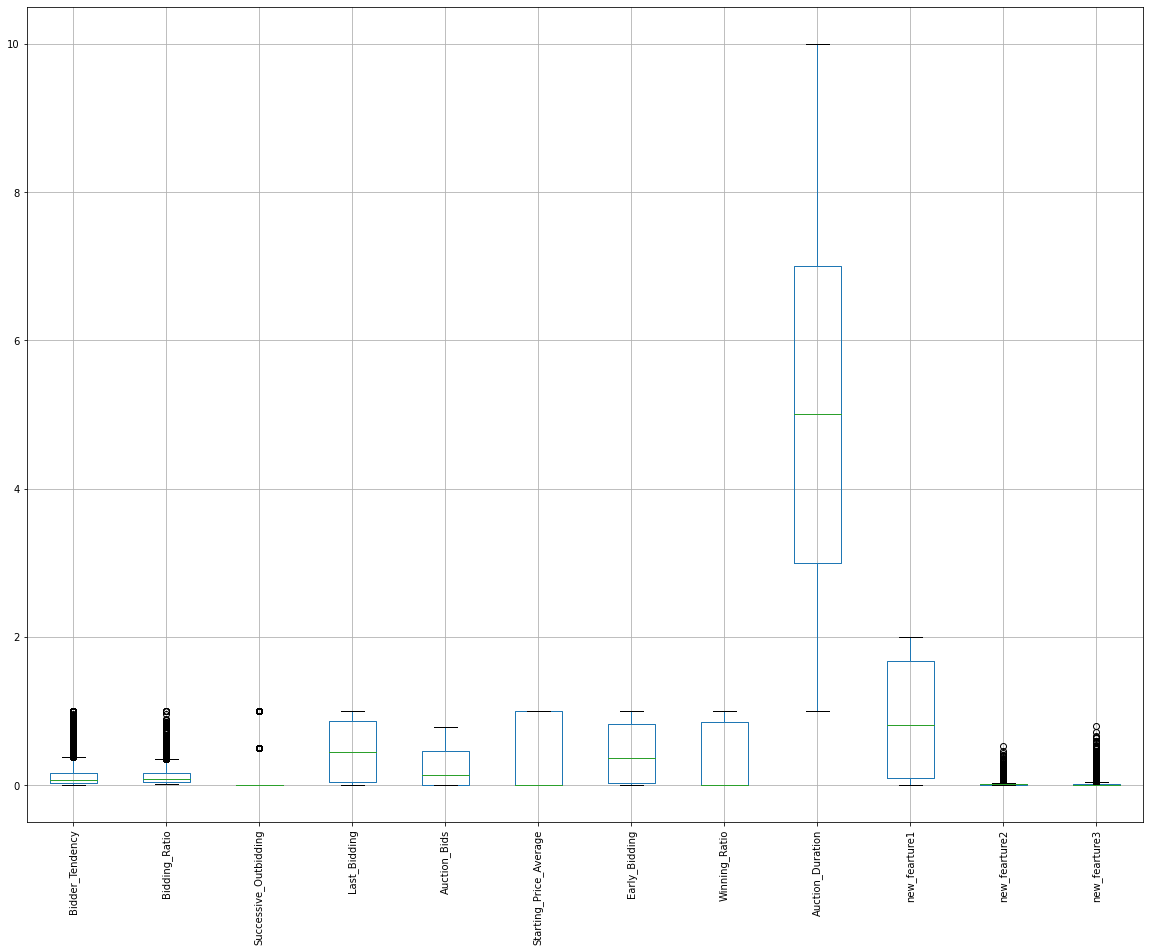

In [ ]:
df_ = df[df.columns.tolist()[3:-1]]

plt.figure(figsize=(20,15))
df_.boxplot()
plt.xticks(rotation=90)
plt.show()

## Machine Learning Models


In this section Machine Learning algorithms will be applied to the data in order to create a classifier system. This system should take the features as parameters and should predict the label of that bidding action as fradualent or not.

### Implementation

Firstly, the features in the dataset are scaled with the min-max scaler in order to create a better classifier. Than the dataset is splitted as traning and set sets. Traning set will be used to train the machine learning algoritm. The test set will be used for testing the efficiency of the machine learning algorithm.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
scaled = msc.fit_transform(df[df.columns[3:]])

train_df = pd.DataFrame(scaled, columns=df.columns[3:])
train_df

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,new_fearture1,new_fearture2,new_fearture3,Class
0,0.200000,0.392857,0.0,0.000028,0.000000,0.993657,0.000028,0.666667,0.444444,0.000028,0.000000,0.100000,0.0
1,0.024390,0.190476,0.0,0.013124,0.000000,0.993657,0.013124,0.944444,0.444444,0.013124,0.000000,0.006098,0.0
2,0.142857,0.190476,0.0,0.003042,0.000000,0.993657,0.003042,1.000000,0.444444,0.003042,0.000000,0.035714,0.0
3,0.100000,0.190476,0.0,0.097487,0.000000,0.993657,0.097487,1.000000,0.444444,0.097487,0.000000,0.025000,0.0
4,0.051282,0.212963,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667,0.001280,0.000000,0.014245,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.150000,1.0,0.738631,0.355224,0.993657,0.686426,0.888889,0.222222,0.712528,0.085535,0.066667,1.0
6317,0.030612,0.120083,0.0,0.005755,0.275795,0.993657,0.000010,0.878788,0.666667,0.002882,0.054138,0.004991,0.0
6318,0.055556,0.032091,0.0,0.015665,0.275795,0.993657,0.015665,0.000000,0.666667,0.015665,0.018046,0.003019,0.0
6319,0.076923,0.076087,0.0,0.068701,0.275795,0.993657,0.000415,0.000000,0.666667,0.034558,0.036092,0.008361,0.0


In this section the test and train sets are splitted.

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df[train_df.columns.tolist()[:-1]].values
y = train_df["Class"].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Logistic Regression

After the train test split, a machine learning algorithm is choosed. Firstly, logistic regression is choosed for creating the classifier. Then the Logisctic regression model is trained with the traning set.

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_valid)

#### Decision Tree

Then, another machine learning algorithm is choosed. Secondly, decision tree model is choosed for creating the classifier. Then the decision tree model is trained with the traning set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model = dtree_model.fit(X_train,y_train)

predictions2 = dtree_model.predict(X_valid)

#### Random Forest


Then, another machine learning algorithm is choosed. Thirdly, random forest (which is an ensemble model of decision tree) model is choosed for creating the classifier. Then the decision tree model is trained with the traning set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)

predictions3 = rf_model.predict(X_valid)

#### xG Boost


Finally, xG Boostt (which is also an ensemble model of decision tree) model is choosed for creating the classifier. Then the decision tree model is trained with the traning set.

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

predictions4 = xgb_model.predict(X_valid)

### Results & Discussion

In this section the efficiency of the implemented machine learning models will be evaluated using different metrics

#### Logistic Regression

This is the report for showing the efficiency of the trainned logistic regression model in terms of different metrics such as precision, recall and f1-score. It is seen that the model is working with 97% accuracy for the classification task.

In [ ]:
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1133
         1.0       0.87      0.89      0.88       132

    accuracy                           0.97      1265
   macro avg       0.93      0.94      0.93      1265
weighted avg       0.97      0.97      0.97      1265



This is the confusion matrix for the trainned Logistic Regression model. In the y axis there are actual labels, and in the x label there are predicted labels. 1 stands for fradualent activities and 0 stands for the normal activities.

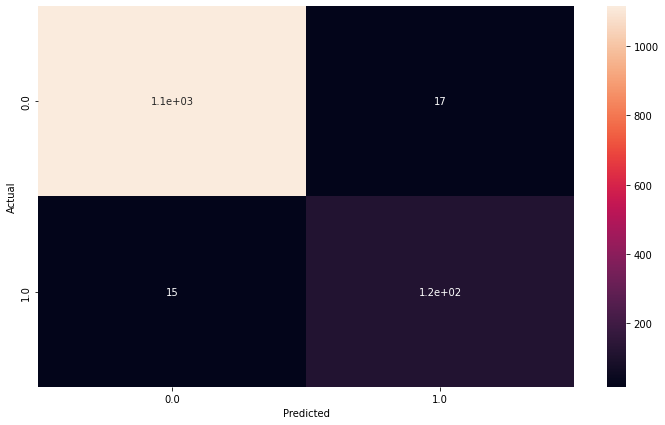

In [ ]:
confusion_matrix = pd.crosstab(y_valid, predictions, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

It is seen that there are 15+17 = 32 false predictions by the model.

#### Decision Tree

This is the report for showing the efficiency of the trainned decision tree model in terms of different metrics such as precision, recall and f1-score. It is seen that the model is working with 99.9% accuracy for the classification task.

In [ ]:
print(classification_report(y_valid,predictions2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1133
         1.0       1.00      0.98      0.99       132

    accuracy                           1.00      1265
   macro avg       1.00      0.99      1.00      1265
weighted avg       1.00      1.00      1.00      1265



This is the confusion matrix for the trained decision tree model. In the y axis there are actual labels, and in the x label there are predicted labels. 1 stands for fradualent activities and 0 stands for the normal activities.

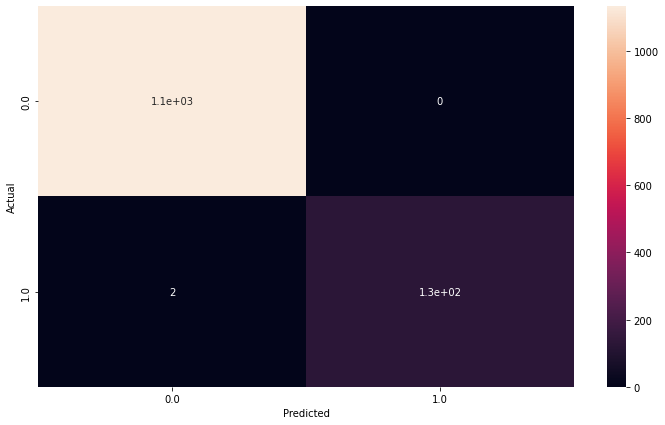

In [ ]:
confusion_matrix = pd.crosstab(y_valid, predictions2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

It is seen that there are 0+1 = 1 false predictions by the model.

#### Random Forest


This is the report for showing the efficiency of the trained random forest model in terms of different metrics such as precision, recall and f1-score. It is seen that the model is working with 95% accuracy for the classification task.

In [ ]:
print(classification_report(y_valid,predictions3))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1133
         1.0       0.92      0.58      0.71       132

    accuracy                           0.95      1265
   macro avg       0.93      0.78      0.84      1265
weighted avg       0.95      0.95      0.95      1265



This is the confusion matrix for the trained Logistic Regression model. In the y axis there are actual labels, and in the x label there are predicted labels. 1 stands for fradualent activities and 0 stands for the normal activities.

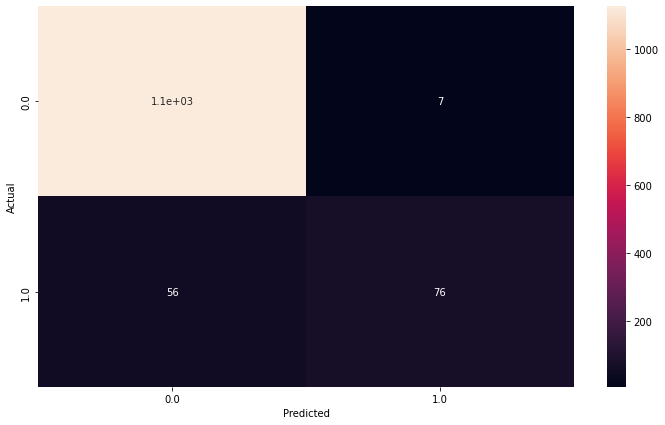

In [ ]:
confusion_matrix = pd.crosstab(y_valid, predictions3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

It is seen that there are 56+7 = 63 false predictions by the model.

#### xG Boost


This is the report for showing the efficiency of the trained xG Boost model in terms of different metrics such as precision, recall and f1-score. It is seen that the model is working with 99.9% accuracy for the classification task.

In [ ]:
print(classification_report(y_valid,predictions4))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1133
         1.0       0.98      0.98      0.98       132

    accuracy                           1.00      1265
   macro avg       0.99      0.99      0.99      1265
weighted avg       1.00      1.00      1.00      1265



This is the confusion matrix for the trained Logistic Regression model. In the y axis there are actual labels, and in the x label there are predicted labels. 1 stands for fradualent activities and 0 stands for the normal activities.

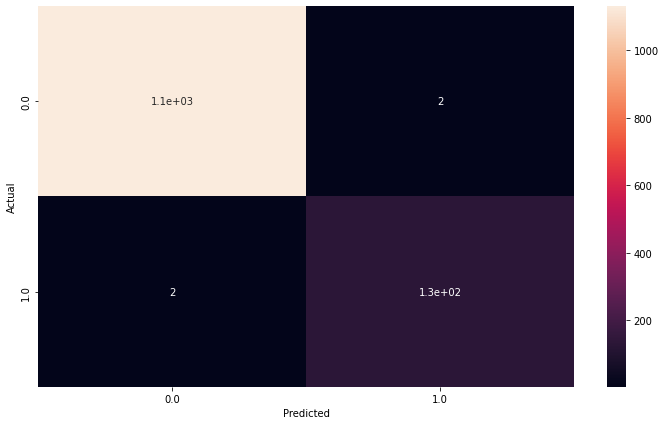

In [ ]:
confusion_matrix = pd.crosstab(y_valid, predictions4, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

It is seen that there are 2+2 = 4 false predictions by the model.

#### Feature Selection

In this part a library for features selection is used. With the help of this library, the most effective features are selected and chosen to train the last model in order to get higher accuracy.

In [ ]:
from sklearn.feature_selection import RFECV
from numpy import array

xgb_model = xgb.XGBClassifier()
rfecv = RFECV(estimator=xgb_model, step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)


mask = rfecv.get_support()
features = array(data.columns)
best_features = features[mask]

print("All features: ", X_train.shape[1])
print(features)

print("Selected best: ", best_features.shape[0])
print(best_features)

All features:  12
['Bidder_Tendency' 'Bidding_Ratio' 'Successive_Outbidding' 'Last_Bidding'
 'Auction_Bids' 'Starting_Price_Average' 'Early_Bidding' 'Winning_Ratio'
 'Auction_Duration' 'new_fearture1' 'new_fearture2' 'new_fearture3']
Selected best:  5
['Bidder_Tendency' 'Successive_Outbidding' 'Last_Bidding' 'Winning_Ratio'
 'Auction_Duration']


The best features for the binary classification is ['Bidder_Tendency' 'Successive_Outbidding' 'Last_Bidding' 'Winning_Ratio'
 'Auction_Duration']

 Also from the plot below, the effect of feature selection on the model efficiency is shown.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


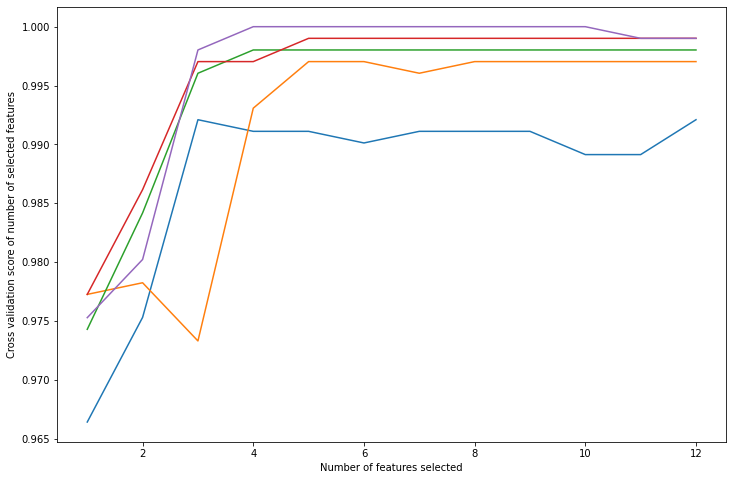

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

After these steps, best ML algorithm is chosen as xG Boost and most effective features for traning are chosen.

#### Hyperparameter Tunning

In this step the selected xG Boost model is tunned using different hyperparameters. The aim is increasing the effectiveness of the model after the hyperparameter tunning.

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(objective="binary:logistic")
grid_cv = GridSearchCV(xgb_model, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:
grid_cv.best_score_

0.9994663765271282

The best parameters for the best score of the xG Boost are given below.

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [ ]:
final_model = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic"
)
final_model.fit(X_train, y_train)

predictions5 = final_model.predict(X_valid)

In [ ]:
print(classification_report(y_valid,predictions5))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1133
         1.0       0.96      0.99      0.98       132

    accuracy                           1.00      1265
   macro avg       0.98      0.99      0.99      1265
weighted avg       1.00      1.00      1.00      1265



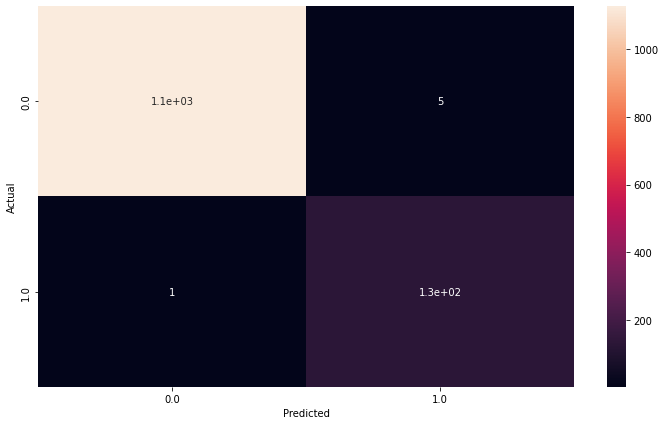

In [ ]:
confusion_matrix = pd.crosstab(y_valid, predictions5, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

## Conclusion

Firstly, the data is read and preprocessed for the later parts of the project. Then statistical analysis and data visulization is performed on the data in order to have a better understanding of the dataset and the features. Also, normalization on the data is done for getting higher efficiency from ten classification models. These normalizations are mainly min-max scaler.

After that, different machine learning algorithms are used to create binary classifier models. These models are trained with the created tranining sets. Then, the efficiency of the models are evaluated with the test sets. These evaluations are done with different metrics such as precision, recall and f1-score.

Finally, most effective parameters are selected. Also the seletected Machine Learning model (xG Boost) is hyperparameter tuned for increasing the efficiency of the classifier

From the results, the classifier with the tunned xG Boost algorithm is working better than the other models. The classifier with the xG Boost algorithm is working with 99.946 % accuracy

## Discussion

In this project; tools such as data preprocessing, feature generation, checking the feature effectiveness, creating different classification models with different ML algoritms, hyperparameter tunning of the ML models are used. Throught the project these concepts are betterly understood by implementing and using them on a real world example.

Results are very promising for classifying the fradualent activities. However, these results can be misleading because of the overfitting of the models or bias on the training or test dataset. In order to be sure about the effectiveness of the classifier further examination and research on the subject can be done. Also the effectiness of the model can be evaluted with using a different dataset.